# Star Wars Survey

In this project we'll look at a Star Wars survey to figure out which Star Wars movies and characters are the fans' most and least favorite. You can find the dataset containing 835 responses from [FiveThirtyEight](https://fivethirtyeight.com/) on their GitHub repository [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We'll start by reading in the data set and taking a look at the columns and first few rows to get an idea for the data we are working with.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We can see the survey contained questions where the respondent had to check one or more boxes. It looks like we'll have to do a lot of data cleaning because this type of data is difficult to represent in columnar format.

`RespondentID` should be a unique ID for each respondent, but some of the entries are blank. We'll remove these invalid rows so that the data set only contains rows where the values are not `NaN`.

In [4]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

Some of the columns in the data set contain the strings `Yes` and `No`. To make the data easier to analyze, we'll convert each column to a Boolean so the values will end up being only `True`, `False`, or `NaN`.

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

for row in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]:
    star_wars[row] = star_wars[row].map(yes_no)
    
print(star_wars.head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please

After printing the first few rows, we can see that we correctly converted the strings to Boolean values.

`star_wars.columns[3:9]` come from boxes that the respondent checks off if they've seen the corresponding film. We'll need to change this data to show `True` or `False` depending on if they've seen the movie or not, and we'll also want to rename the column names to the corresponding movie to make it easier for us to interpret.

In [6]:
import numpy as np

map_dictionary = {
    np.nan: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(map_dictionary)

In [7]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now we can see that the values in these 6 columns have been succesfully changed to Boolean values. Now we'll finish cleaning up these columns by renaming them.

In [8]:
movie_seen = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_ep1",
    "Unnamed: 4": "seen_ep2",
    "Unnamed: 5": "seen_ep3",
    "Unnamed: 6": "seen_ep4",
    "Unnamed: 7": "seen_ep5",
    "Unnamed: 8": "seen_ep6"
}

star_wars = star_wars.rename(columns=movie_seen)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


`star_wars.columns[9:15]` ask the respondent to rank the Star Wars movies in order from the least favorite as number 6 to the most favorite as number 1. We will rename the columns to with the respective Star Wars movie, and we'll convert the columns to numeric type.

In [9]:
movie_rank = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank_ep1",
    "Unnamed: 10": "rank_ep2",
    "Unnamed: 11": "rank_ep3",
    "Unnamed: 12": "rank_ep4",
    "Unnamed: 13": "rank_ep5",
    "Unnamed: 14": "rank_ep6"
    
}

star_wars = star_wars.rename(columns=movie_rank)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,rank_ep1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

We can quickly find the highest-ranked movie now that the columns have been cleaned. We'll do this by looking at the mean ranking for each episode.

In [11]:
star_wars[star_wars.columns[9:15]].mean()

rank_ep1    3.732934
rank_ep2    4.087321
rank_ep3    4.341317
rank_ep4    3.272727
rank_ep5    2.513158
rank_ep6    3.047847
dtype: float64

<BarContainer object of 6 artists>

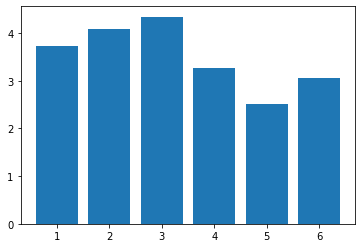

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(1,7), star_wars[star_wars.columns[9:15]].mean())

Now we can easily see that Star Wars Episode 5 ranks the highest, and episodes 4, 5, and 6 all rank higher than the first 3 episodes. 

Next we'll figure out how many respondents have seen each movie by looking at the sum of the `seen_ep#` columns. Pandas will treat the Booleans like integers, so that makes it easy to sum everything up.

In [13]:
star_wars[star_wars.columns[3:9]].sum()

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

<BarContainer object of 6 artists>

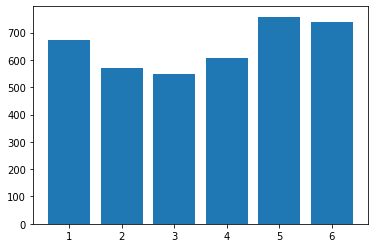

In [16]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())

It looks like the first Star Wars movies (Episodes 4, 5 & 6) were seen by more respondents than the newer Star Wars movies (Episodes 1, 2, & 3), so it still seems that the old Star Wars films are more popular.

Now let's examine how certain segments of the survey population responded. 

One column we could use to do this asks the question `Do you consider yourself to be a fan of the Star Wars film franchise?`. For example, we can use this to determine which of the movies rank highest among the self-declared Star Wars fans. Other columns we can look at are `Do you consider yourself to be a fan of the Star Trek franchise?` and `Gender`. 

If we split the dataframe into two groups based on one of these binary columns, then we can create two subsets of that column and compute things for each group like most viewed movie, highest-ranked movie, and other statistics.

We'll take a look at the most viewed movie and highest-ranked movie based on if the respondent is a Star Wars fan or not, and we'll compare these results the results got from looking at all the respondents shown above.

### Star Wars Rankings by Fan vs. Not Fan

In [36]:
sw_fan = star_wars[star_wars.iloc[:, 2] == True]
sw_notfan = star_wars[star_wars.iloc[:, 2] == False]

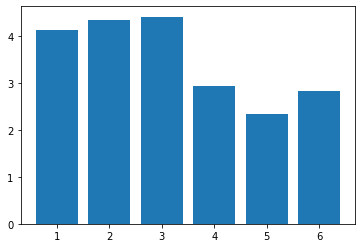

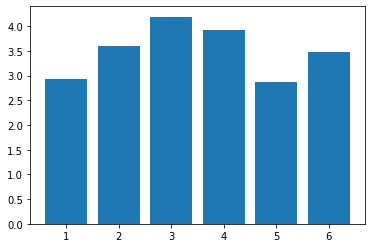

In [40]:
plt.bar(range(1,7), sw_fan[sw_fan.columns[9:15]].mean())
plt.show()

plt.bar(range(1,7), sw_notfan[sw_notfan.columns[9:15]].mean())
plt.show()

We can see that among Star Wars fans, the older films (Episodes 4, 5, and 6) are ranked higher on average.

### Star Wars View Counts by Fan vs. Not Fan

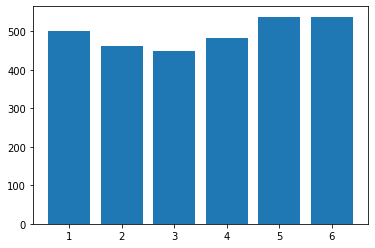

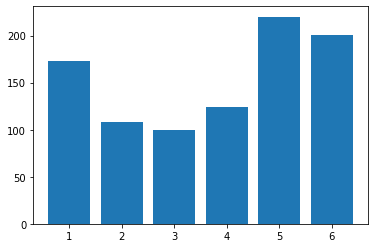

In [43]:
plt.bar(range(1,7), sw_fan[sw_fan.columns[3:9]].sum())
plt.show()

plt.bar(range(1,7), sw_notfan[sw_notfan.columns[3:9]].sum())
plt.show()

When it comes to total view counts by all respondents who are fans and not fans, we can clearly see that most of the self-declared Star Wars fans have seen all the movies, and many of the the non-fans seem to have not seen Episodes 2, 3, and 5.

Some potential next steps for exloring this data:

* Segment the data based on Education, Location, etc.
* Clean up columns 15 through 29 to see which characters the respondents view more or less favorably, which characters are the most likes and least liked, and which characters are most controversial with the largest split betweet likes and dislikes.

The idea for this project comes from the [Dataquest](https://app.dataquest.io/) **Data Cleaning Project Walkthrough** course.


